# Probabilistic risk estimate -- travelling

budget planning exercise for a vacation to a fictional winter island country to answer the question of “How Much Will My Holiday To Fantasy Island Cost ?”

In [23]:
import pandas as pd

## Model 1: Single Point Estimate

a simple *deterministic* approach would be to list the relevant sub elements that would make the total holiday cost and then make an estimate for each sub element and compile the resulting total.

In [24]:
data = [
    ['Plane Fare', 8_500, 'Based on travel websites and different plan flight costs for economy class'],
    ['Accommodation Costs', 3_000, '5 night X 600/day based on online survey of hostl and hotel rate'],
    ['Meals', 700, '5 night X 140/day based on online travel blogs'],
    ['Misc. Shopping Expenses', 1_000, '"Fixed" budget set'],
    ['Holiday Activity/Tours', 3_000, '"Fixed" budget set'],
    ['Clothing/Travel Gear', 400, 'Based on online apparel store prices for hiking equipment and winter jackets'],
    ['GRAND TOTAL(In FB)', 16_600, ''],
    ['GRAND TOTAL(In USD)', 4_150, 'Exchange rate 1 USD=4 FB tokens']
]
m1 = pd.DataFrame(data=data, columns=['Element', 'Estimate', 'Estimate Basis/Assumptions'])
m1

,Element,Estimate,Estimate Basis/Assumptions
0,Plane Fare,8500,Based on travel websites and different plan fl...
1,Accommodation Costs,3000,5 night X 600/day based on online survey of ho...
2,Meals,700,5 night X 140/day based on online travel blogs
3,Misc. Shopping Expenses,1000,"""Fixed"" budget set"
4,Holiday Activity/Tours,3000,"""Fixed"" budget set"
5,Clothing/Travel Gear,400,Based on online apparel store prices for hikin...
6,GRAND TOTAL(In FB),16600,
7,GRAND TOTAL(In USD),4150,Exchange rate 1 USD=4 FB tokens


## Model 2: Worst-Best Case Estimate

In [25]:
data = [
    ['Plane Fare', 5_000, 12_000,'Based on travel websites and different plan flight costs for economy class'],
    ['Accommodation Costs', 2_000, 4_000, '5 night X 600/day based on online survey of hostl and hotel rate'],
    ['Meals', 500, 900, '5 night X 140/day based on online travel blogs'],
    ['Misc. Shopping Expenses', 1_000, 1_000, '"Fixed" budget set'],
    ['Holiday Activity/Tours', 3_000, 3_000, '"Fixed" budget set'],
    ['Clothing/Travel Gear', 300, 500, 'Based on online apparel store prices for hiking equipment and winter jackets'],
    ['GRAND TOTAL(In FB)', 11_800, 21_400, ''],
    ['GRAND TOTAL(In USD)', 2_950, 5_350, 'Exchange rate 1 USD=4 FB tokens']
]
m1 = pd.DataFrame(data=data, columns=['Element', 'Est Low', 'Est High', 'Estimate Basis/Assumptions'])
m1

,Element,Est Low,Est High,Estimate Basis/Assumptions
0,Plane Fare,5000,12000,Based on travel websites and different plan fl...
1,Accommodation Costs,2000,4000,5 night X 600/day based on online survey of ho...
2,Meals,500,900,5 night X 140/day based on online travel blogs
3,Misc. Shopping Expenses,1000,1000,"""Fixed"" budget set"
4,Holiday Activity/Tours,3000,3000,"""Fixed"" budget set"
5,Clothing/Travel Gear,300,500,Based on online apparel store prices for hikin...
6,GRAND TOTAL(In FB),11800,21400,
7,GRAND TOTAL(In USD),2950,5350,Exchange rate 1 USD=4 FB tokens


## Model 3

In [26]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mcerp import correlate, correlation_matrix, plotcorr
from mcerp import Beta, Uniform, PERT, Binomial
from mcerp import uv, stats

from scipy import stats as stats
from scipy.stats import rv_continuous, rv_histogram

np.set_printoptions(precision=3, suppress=True)
pd.options.display.float_format = '{:.3f}'.format

In [27]:
# helper function: plot histogram
def plot_hist(data, title):
    hist = np.histogram(data, bins=100)
    histdist = rv_histogram(hist)

    X = np.linspace(data.min(), data.max(), 100)
    plt.title(title)
    plt.hist(data, density=True, bins=100)
    plt.plot(X, histdist.pdf(X))
    plt.show()

In [28]:
npts=10000 #No of simulation runs 

x=PERT(1,4,10) 
x.describe()  
rx=x._mcpts # shows an array of all the individual simulation results
rx

MCERP Uncertain Value:
 > Mean...................  4.4999887989433605
 > Variance...............  2.749912877477742
 > Skewness Coefficient...  0.3013305126234554
 > Kurtosis Coefficient...  2.453922406537562



array([2.534, 6.446, 5.519, ..., 3.734, 3.53 , 5.513])

In [29]:
#InputVariables
PertLambda = 4
PlaneFare= PERT(5000,7000,12000,PertLambda) #BetaPert 
AccommodationCosts = PERT(2000,2500,4000,PertLambda) #BetaPert 
Meals=PERT(500,600,900,PertLambda)   #BetaPert 
MiscShoppingExpenses=1000 #Has No Range as It is UnRisked
HolidayActivityTours=Uniform(1500,4000) #Uniform
ClothingTravelGear=PERT(300,400,500,PertLambda) #BetaPert 

MedicalEmergencyRiskLikehood=Binomial(1, 0.1)
MedicalEmergencyRiskImpact=Uniform(1000,5000)

TheftRiskLikelihood=Binomial(1, 0.1)
TheftRiskImpact=PERT(500,750,2000,PertLambda) #BetaPert

In [30]:
#OutputVariables
RiskedRanges = PlaneFare+AccommodationCosts+Meals+MiscShoppingExpenses+HolidayActivityTours+ClothingTravelGear
DiscreteRisks=MedicalEmergencyRiskLikehood*MedicalEmergencyRiskImpact+TheftRiskLikelihood*TheftRiskImpact
TotalHolidayCosts=RiskedRanges+DiscreteRisks

In [31]:
#Budget denominated in Fantasy Bucks 
TotalHolidayCosts.describe()

MCERP Uncertain Value:
 > Mean...................  15346.072519674704
 > Variance...............  3273420.2125230585
 > Skewness Coefficient...  0.635462702658001
 > Kurtosis Coefficient...  3.6812988307585424



In [32]:
# collect the results in array variables

rPlaneFare = PlaneFare._mcpts
rAccommodationCosts = AccommodationCosts._mcpts
rMeals = Meals._mcpts
rHolidayActivityTours = HolidayActivityTours._mcpts
rClothingTravelGear = ClothingTravelGear._mcpts
rMedicalEmergencyRiskLikehood = MedicalEmergencyRiskLikehood._mcpts
rMedicalEmergencyRiskImpact=MedicalEmergencyRiskImpact._mcpts
rTheftRiskLikelihood=TheftRiskLikelihood._mcpts
rTheftRiskImpact=TheftRiskImpact._mcpts
rRiskedRanges=RiskedRanges._mcpts
rDiscreteRisks=DiscreteRisks._mcpts
rTotalHolidayCosts=TotalHolidayCosts._mcpts

# combine the arrays in a 2-dimensional array
rand1 = np.vstack((rPlaneFare,rAccommodationCosts,rMeals,rHolidayActivityTours,rClothingTravelGear,
                   rMedicalEmergencyRiskLikehood,rMedicalEmergencyRiskImpact,
                  rTheftRiskLikelihood,rTheftRiskImpact,rRiskedRanges,rDiscreteRisks,rTotalHolidayCosts))

VarNames=["Input_PlaneFare", "Input_AccomCosts", "Input_Meals", "Input_HolidayActivityTours", "Input_ClothingTravelGear", 
          "Input_MedEmergencyChance","Input_MedEmergencyCost","Input_TheftRiskChance","Input_TheftRiskCost",
         "Output_RiskedRanges","Output_DiscreteRisks","Output_TotalHolidayCosts"]

# copy the array to a dataframe for a more transparent layout
df1 = pd.DataFrame(data=rand1).T 
df1.columns=VarNames
df1

,Input_PlaneFare,Input_AccomCosts,Input_Meals,Input_HolidayActivityTours,Input_ClothingTravelGear,Input_MedEmergencyChance,Input_MedEmergencyCost,Input_TheftRiskChance,Input_TheftRiskCost,Output_RiskedRanges,Output_DiscreteRisks,Output_TotalHolidayCosts
0,6832.433,3234.632,683.133,2698.544,416.515,0.000,4255.857,0.000,624.934,14865.258,0.000,14865.258
1,8340.710,2462.421,687.542,1753.462,418.549,0.000,1214.623,0.000,1082.929,14662.683,0.000,14662.683
2,7831.861,2212.642,652.114,1683.320,463.167,0.000,1143.863,0.000,554.600,13843.105,0.000,13843.105
3,5693.556,2802.256,613.686,1741.924,437.480,0.000,4571.083,0.000,726.393,12288.902,0.000,12288.902
4,6868.501,2125.278,562.032,2461.975,383.314,0.000,2968.501,1.000,669.387,13401.101,669.387,14070.488
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8512.878,2504.392,682.192,1630.458,370.157,0.000,4913.243,0.000,596.623,14700.076,0.000,14700.076
9996,7029.290,2385.287,625.301,1985.874,431.162,0.000,3877.219,1.000,975.255,13456.914,975.255,14432.168
9997,5563.292,2420.356,646.374,2812.866,362.272,0.000,3135.818,0.000,1213.942,12805.160,0.000,12805.160
9998,7645.104,2329.844,620.036,3788.853,375.300,0.000,1007.066,0.000,647.522,15759.136,0.000,15759.136


In [33]:
df1.quantile([.1, .25, .5, .75, .9], axis = 0)

,Input_PlaneFare,Input_AccomCosts,Input_Meals,Input_HolidayActivityTours,Input_ClothingTravelGear,Input_MedEmergencyChance,Input_MedEmergencyCost,Input_TheftRiskChance,Input_TheftRiskCost,Output_RiskedRanges,Output_DiscreteRisks,Output_TotalHolidayCosts
0.100,5904.398,2224.491,544.901,1750.002,349.340,0.000,1400.309,0.000,614.042,13053.993,0.000,13177.730
0.250,6512.568,2387.536,577.508,2125.084,371.892,0.000,2000.201,0.000,715.761,13879.296,0.000,14061.629
0.500,7382.686,2627.660,625.527,2749.980,400.002,0.000,3000.050,0.000,877.958,14874.994,0.000,15163.855
0.750,8374.595,2908.301,681.675,3374.942,428.109,0.000,3999.996,0.000,1080.519,15966.903,0.000,16415.640
0.900,9272.406,3167.583,733.554,3749.814,450.662,0.100,4599.798,0.100,1277.785,16957.214,1330.814,17709.461


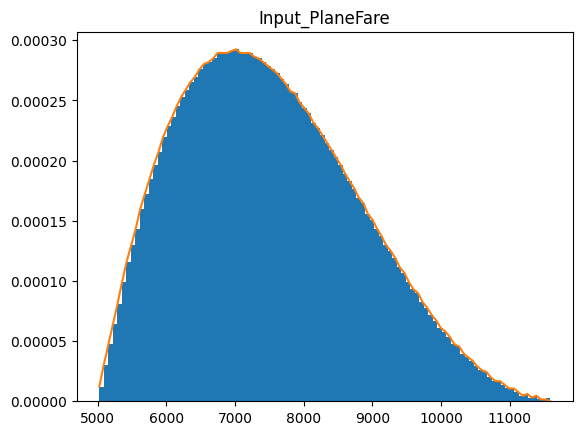

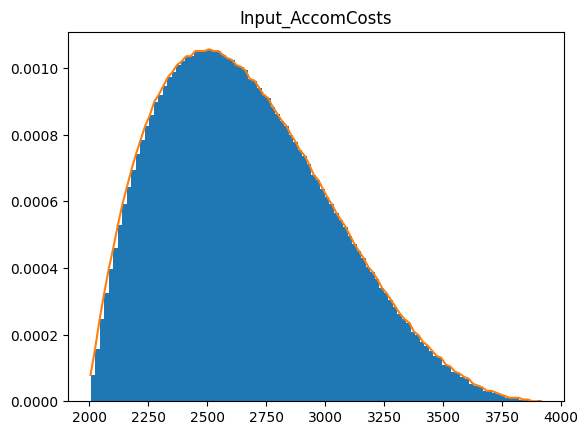

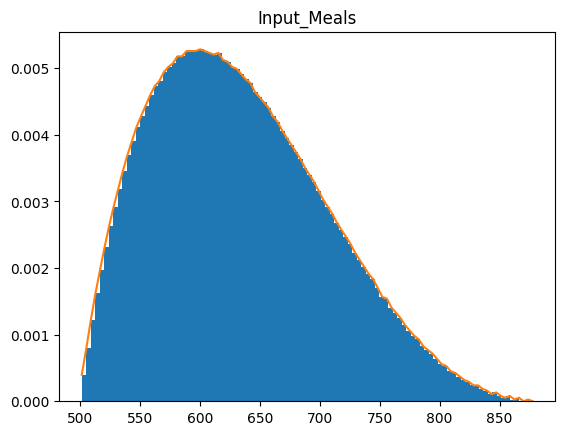

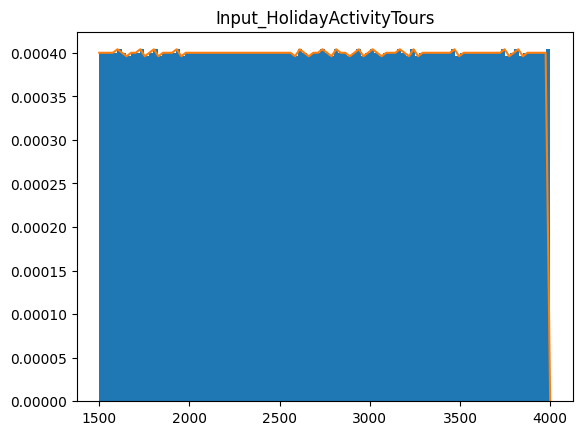

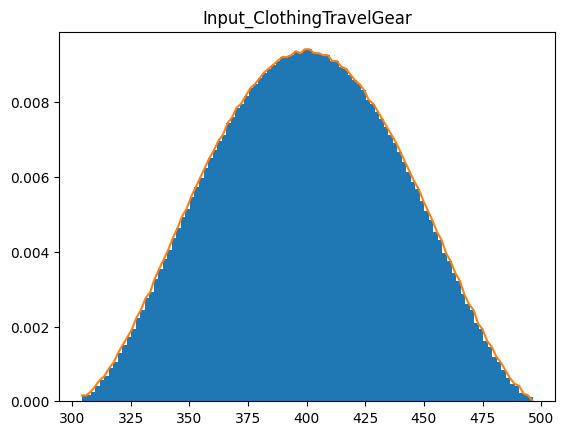

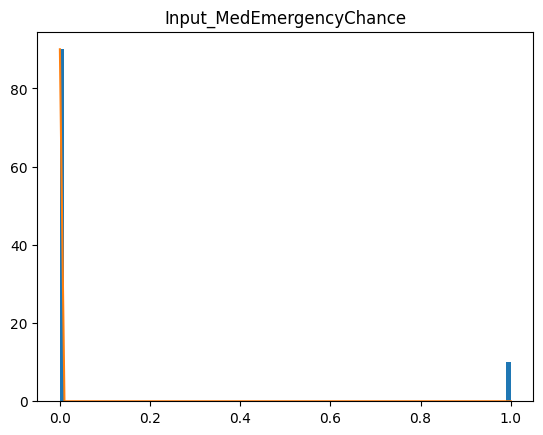

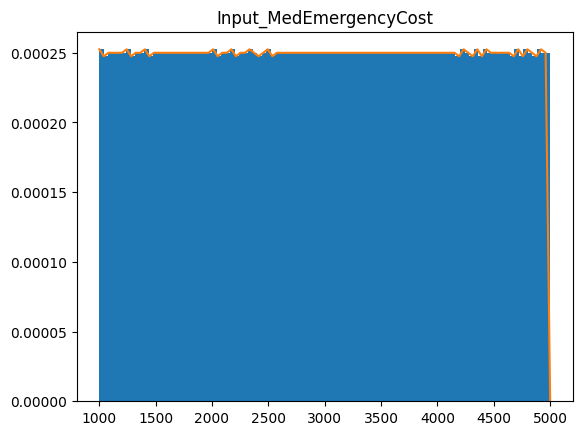

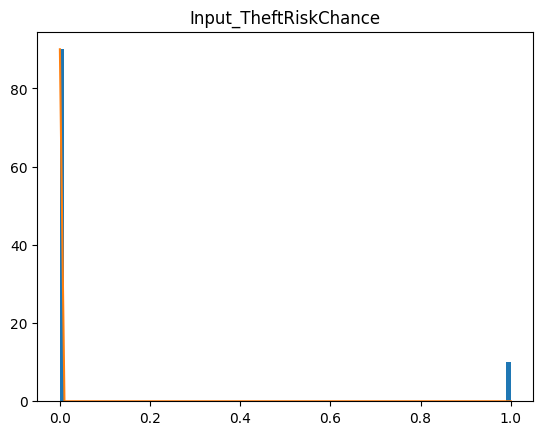

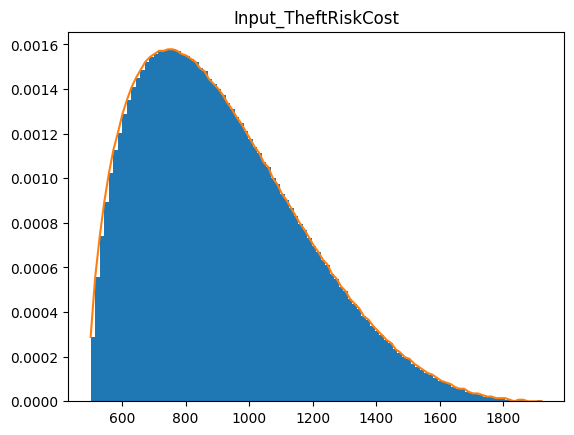

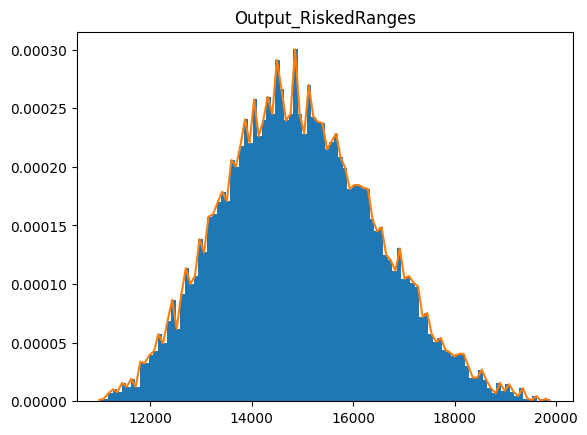

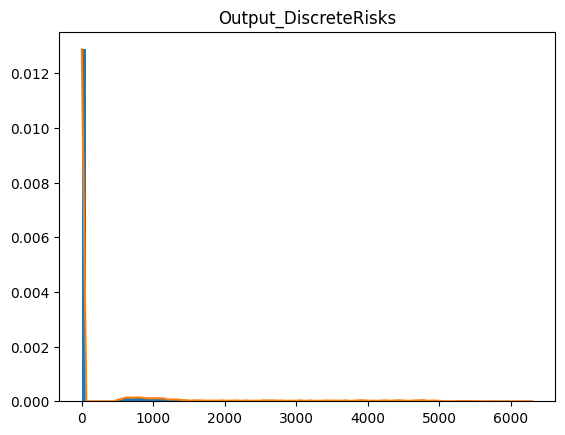

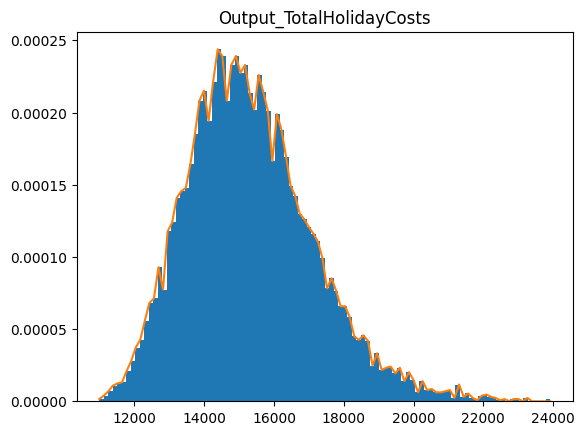

In [34]:
VarSimResults=[rPlaneFare,rAccommodationCosts,rMeals,rHolidayActivityTours,rClothingTravelGear,
                rMedicalEmergencyRiskLikehood,rMedicalEmergencyRiskImpact,rTheftRiskLikelihood,
               rTheftRiskImpact,rRiskedRanges,rDiscreteRisks,rTotalHolidayCosts]



for n in range(0,len(VarSimResults)):
    plot_hist(VarSimResults[n],VarNames[n])

In [35]:
# get the correlation matrix BEFORE applying correlation
BeforeCorrApplied = correlation_matrix([AccommodationCosts, Meals, HolidayActivityTours])
BeforeCorrApplied

array([[ 1.   ,  0.004, -0.   ],
       [ 0.004,  1.   , -0.005],
       [-0.   , -0.005,  1.   ]])

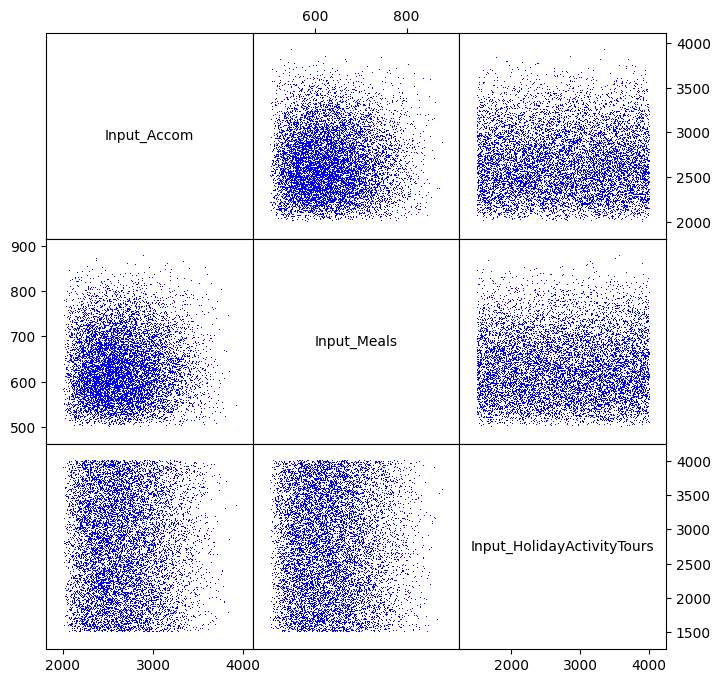

In [36]:
# plot correlations BEFORE applying correlation
corrplot0 = plotcorr([AccommodationCosts, Meals, HolidayActivityTours], labels=["Input_Accom", 
                                                                                "Input_Meals", "Input_HolidayActivityTours"])

## Model 4

In [38]:
applied_correlation=np.array([[1.00, 0.85,  0.85],
                               [0.85,  1.00, 0.85],
                               [0.85,  0.85, 1.0]])

# impose the targeted correlation matrix on the 3 input variables
correlate([AccommodationCosts, Meals, HolidayActivityTours], applied_correlation)

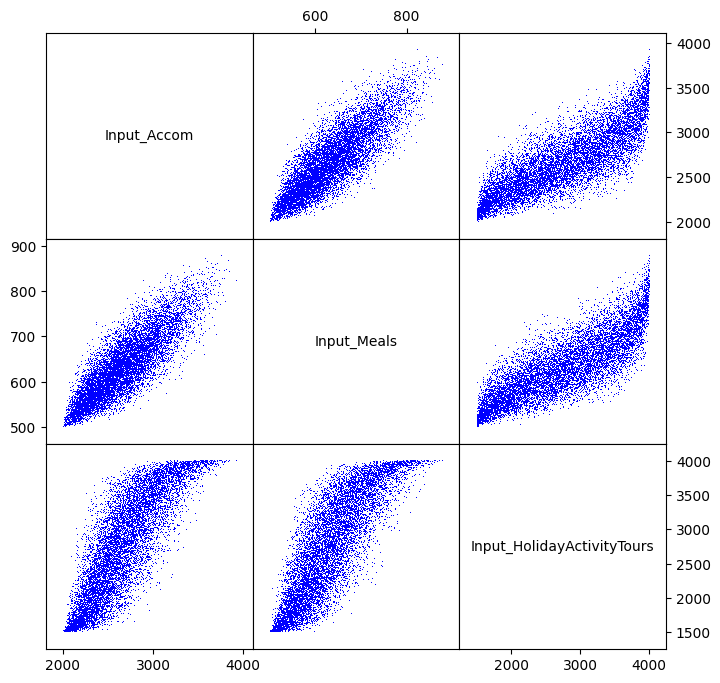

In [39]:
# plot the new correlation matrix of the input variables
corrplot2 = plotcorr([AccommodationCosts, Meals, HolidayActivityTours], 
                     labels=["Input_Accom","Input_Meals", "Input_HolidayActivityTours"])

In [40]:
# check the new correlation matrix for the 3 input variables
calculatedCorr = correlation_matrix([AccommodationCosts, Meals, HolidayActivityTours])
calculatedCorr

array([[1.   , 0.847, 0.831],
       [0.847, 1.   , 0.831],
       [0.831, 0.831, 1.   ]])

In [41]:
#OutputVariables - Rerun with Corr Variables
RiskedRanges = PlaneFare+AccommodationCosts+Meals+MiscShoppingExpenses+HolidayActivityTours+ClothingTravelGear
DiscreteRisks=MedicalEmergencyRiskLikehood*MedicalEmergencyRiskImpact+TheftRiskLikelihood*TheftRiskImpact
TotalHolidayCosts=RiskedRanges+DiscreteRisks

In [42]:
#Budget denominated in Fantasy Bucks With Correlated Inputs 
TotalHolidayCosts.describe()

MCERP Uncertain Value:
 > Mean...................  15346.0725196747
 > Variance...............  3820333.203227748
 > Skewness Coefficient...  0.543930434673001
 > Kurtosis Coefficient...  3.457598968811599



In [51]:
# run the simulation model, 
# and collect the results in array variables


rPlaneFare = PlaneFare._mcpts
rAccommodationCosts = AccommodationCosts._mcpts
rMeals = Meals._mcpts
rHolidayActivityTours = HolidayActivityTours._mcpts
rClothingTravelGear = ClothingTravelGear._mcpts
rMedicalEmergencyRiskLikehood = MedicalEmergencyRiskLikehood._mcpts
rMedicalEmergencyRiskImpact=MedicalEmergencyRiskImpact._mcpts
rTheftRiskLikelihood=TheftRiskLikelihood._mcpts
rTheftRiskImpact=TheftRiskImpact._mcpts
rRiskedRanges=RiskedRanges._mcpts
rDiscreteRisks=DiscreteRisks._mcpts
rTotalHolidayCosts=TotalHolidayCosts._mcpts

# combine the arrays in a 2-dimensional array
rand1 = np.vstack((rPlaneFare,rAccommodationCosts,rMeals,rHolidayActivityTours,rClothingTravelGear,
                   rMedicalEmergencyRiskLikehood,rMedicalEmergencyRiskImpact,
                  rTheftRiskLikelihood,rTheftRiskImpact,rRiskedRanges,rDiscreteRisks,rTotalHolidayCosts))

VarNames=["Input_PlaneFare", "Input_AccomCosts", "Input_Meals", "Input_HolidayActivityTours", "Input_ClothingTravelGear", 
          "Input_MedEmergencyChance","Input_MedEmergencyCost","Input_TheftRiskChance","Input_TheftRiskCost",
         "Output_RiskedRanges","Output_DiscreteRisks","Output_TotalHolidayCosts"]

# copy the array to a dataframe for a more transparent layout
df_postCorr = pd.DataFrame(data=rand1).T 
df_postCorr.columns=VarNames
df_postCorr

,Input_PlaneFare,Input_AccomCosts,Input_Meals,Input_HolidayActivityTours,Input_ClothingTravelGear,Input_MedEmergencyChance,Input_MedEmergencyCost,Input_TheftRiskChance,Input_TheftRiskCost,Output_RiskedRanges,Output_DiscreteRisks,Output_TotalHolidayCosts
0,6832.433,3234.632,759.898,3785.520,416.515,0.000,4255.857,0.000,624.934,16028.997,0.000,16028.997
1,8340.710,2462.421,626.734,2036.624,418.549,0.000,1214.623,0.000,1082.929,14885.037,0.000,14885.037
2,7831.861,2212.642,561.215,1604.255,463.167,0.000,1143.863,0.000,554.600,13673.141,0.000,13673.141
3,5693.556,2802.256,648.438,2470.076,437.480,0.000,4571.083,0.000,726.393,13051.805,0.000,13051.805
4,6868.501,2125.278,519.779,1569.616,383.314,0.000,2968.501,1.000,669.387,12466.489,669.387,13135.876
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8512.878,2504.392,632.147,1976.340,370.157,0.000,4913.243,0.000,596.623,14995.914,0.000,14995.914
9996,7029.290,2385.287,583.586,1900.545,431.162,0.000,3877.219,1.000,975.255,13329.871,975.255,14305.126
9997,5563.292,2420.356,599.411,2367.748,362.272,0.000,3135.818,0.000,1213.942,12313.080,0.000,12313.080
9998,7645.104,2329.844,572.002,2646.749,375.300,0.000,1007.066,0.000,647.522,14568.999,0.000,14568.999


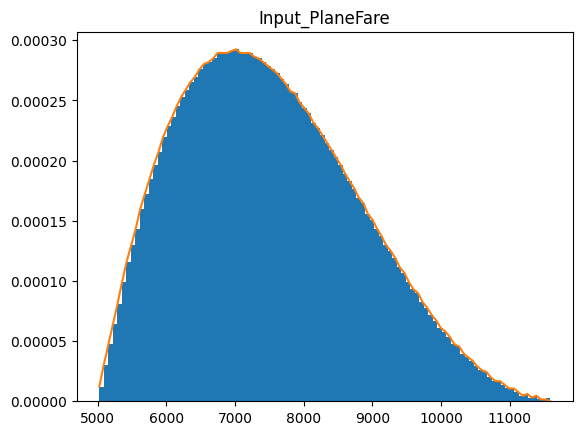

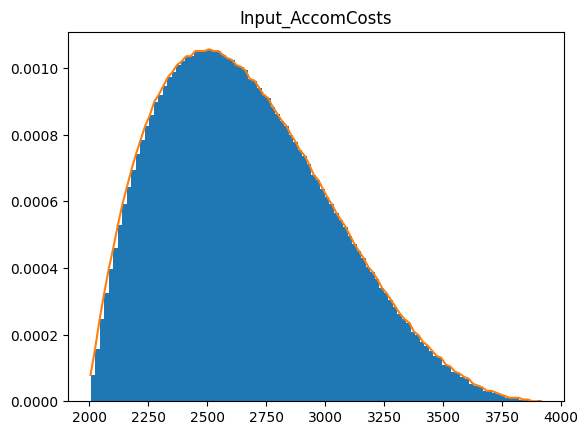

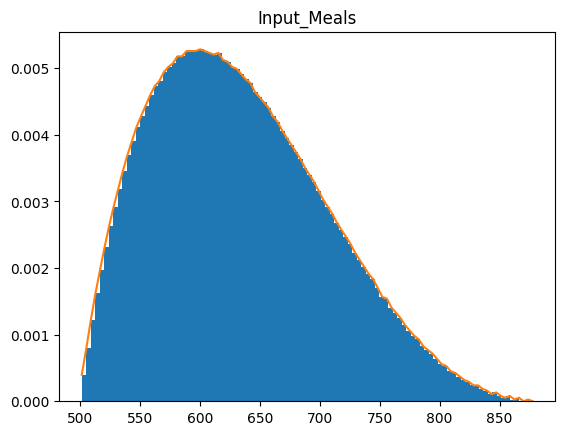

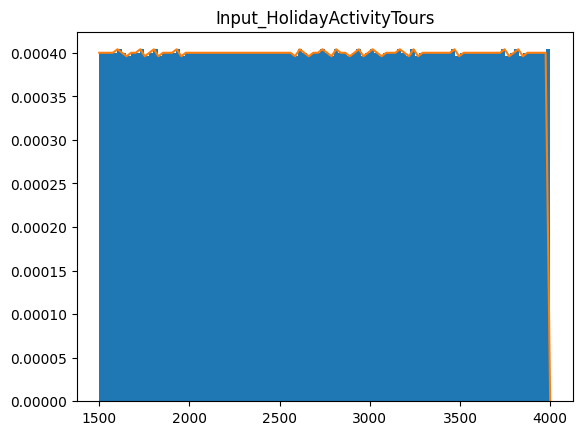

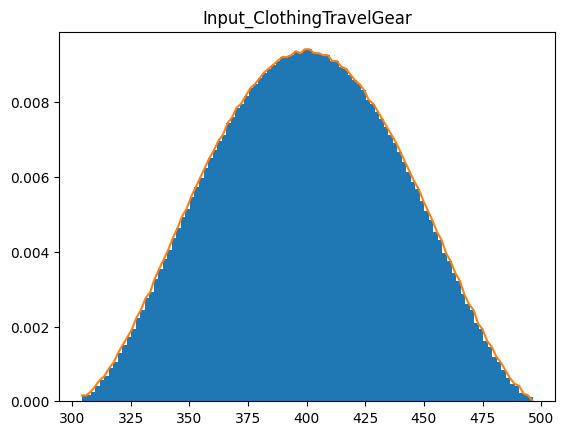

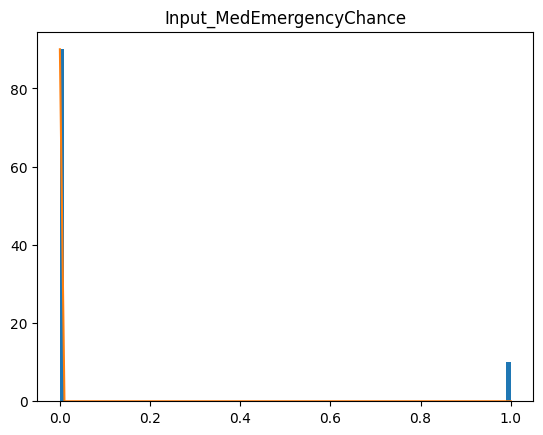

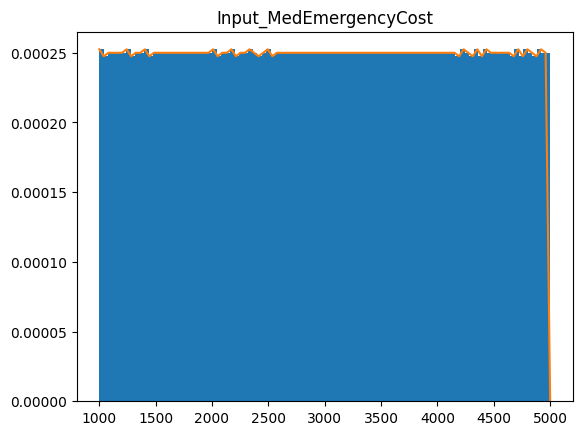

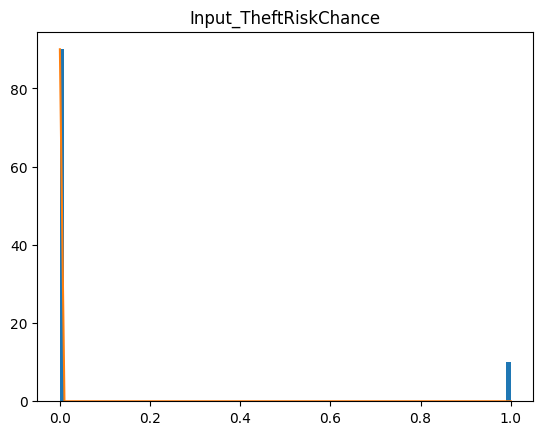

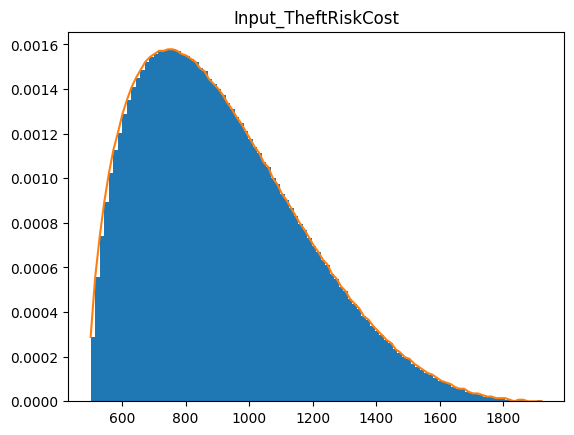

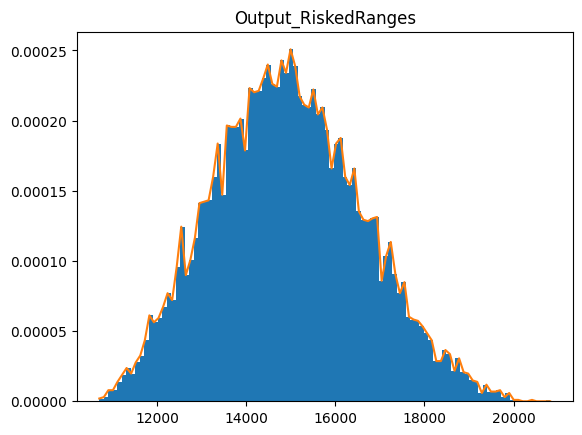

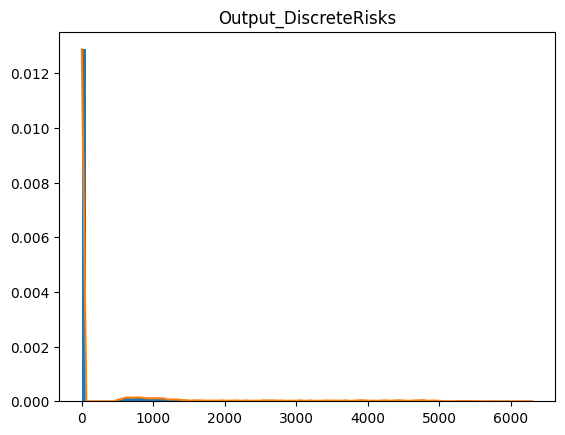

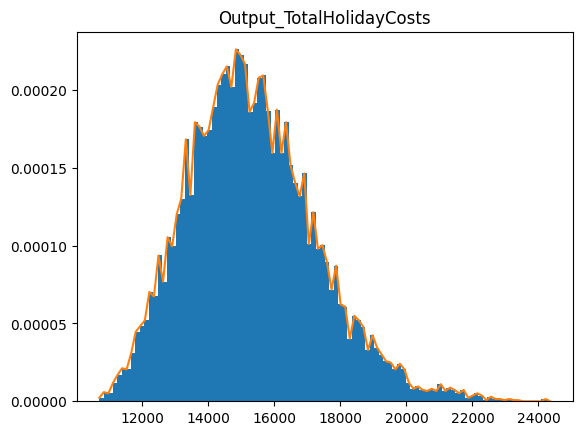

In [52]:
# helper function: plot histogram
VarSimResults=[rPlaneFare,rAccommodationCosts,rMeals,rHolidayActivityTours,rClothingTravelGear,
                rMedicalEmergencyRiskLikehood,rMedicalEmergencyRiskImpact,rTheftRiskLikelihood,
               rTheftRiskImpact,rRiskedRanges,rDiscreteRisks,rTotalHolidayCosts]



for n in range(0,len(VarSimResults)):
    plot_hist(VarSimResults[n],VarNames[n])

In [55]:
df_postCorr[["Output_RiskedRanges","Output_DiscreteRisks","Output_TotalHolidayCosts"]].quantile([.1, .25, .5, .75, 0.9], axis=0)

,Output_RiskedRanges,Output_DiscreteRisks,Output_TotalHolidayCosts
0.100,12815.256,0.000,12969.224
0.250,13754.082,0.000,13955.179
0.500,14893.852,0.000,15172.363
0.750,16074.446,0.000,16533.045
0.900,17178.138,1330.814,17894.189


In [54]:
#Comparing against the uncorrelated results
df1[["Output_RiskedRanges","Output_DiscreteRisks","Output_TotalHolidayCosts"]].quantile([.1, .25, .5, .75, .9], axis = 0)


,Output_RiskedRanges,Output_DiscreteRisks,Output_TotalHolidayCosts
0.100,13053.993,0.000,13177.730
0.250,13879.296,0.000,14061.629
0.500,14874.994,0.000,15163.855
0.750,15966.903,0.000,16415.640
0.900,16957.214,1330.814,17709.461


In [56]:
FOREXVariability=PERT(3.75,4.00,4.50) #BetaPert

#OutputVariables - Rerun with Corr Variables AND FOREX
RiskedRanges = PlaneFare+AccommodationCosts+Meals+MiscShoppingExpenses+HolidayActivityTours+ClothingTravelGear
DiscreteRisks=MedicalEmergencyRiskLikehood*MedicalEmergencyRiskImpact+TheftRiskLikelihood*TheftRiskImpact
TotalHolidayCosts=RiskedRanges+DiscreteRisks
TotalHolidayCostsInUSD=TotalHolidayCosts/FOREXVariability

In [57]:
# run the simulation model, 
# and collect the results in array variables


rPlaneFare = PlaneFare._mcpts
rAccommodationCosts = AccommodationCosts._mcpts
rMeals = Meals._mcpts
rHolidayActivityTours = HolidayActivityTours._mcpts
rClothingTravelGear = ClothingTravelGear._mcpts
rMedicalEmergencyRiskLikehood = MedicalEmergencyRiskLikehood._mcpts
rMedicalEmergencyRiskImpact=MedicalEmergencyRiskImpact._mcpts
rTheftRiskLikelihood=TheftRiskLikelihood._mcpts
rTheftRiskImpact=TheftRiskImpact._mcpts
rRiskedRanges=RiskedRanges._mcpts
rDiscreteRisks=DiscreteRisks._mcpts
rTotalHolidayCosts=TotalHolidayCosts._mcpts
rFOREXVariability=FOREXVariability._mcpts
rTotalHolidayCostsInUSD=TotalHolidayCostsInUSD._mcpts

# combine the arrays in a 2-dimensional array
rand1 = np.vstack((rPlaneFare,rAccommodationCosts,rMeals,rHolidayActivityTours,rClothingTravelGear,
                   rMedicalEmergencyRiskLikehood,rMedicalEmergencyRiskImpact,
                  rTheftRiskLikelihood,rTheftRiskImpact,rRiskedRanges,
                   rDiscreteRisks,rFOREXVariability,rTotalHolidayCostsInUSD))

VarNames=["Input_PlaneFare", "Input_AccomCosts", "Input_Meals", "Input_HolidayActivityTours", "Input_ClothingTravelGear", 
          "Input_MedEmergencyChance","Input_MedEmergencyCost","Input_TheftRiskChance","Input_TheftRiskCost",
         "Output_RiskedRanges","Output_DiscreteRisks","Output_FOREXVariability","Output_TotalHolidayCostsInUSD"]

# copy the array to a dataframe for a more transparent layout
df_postCorrPlusFOREX= pd.DataFrame(data=rand1).T 
df_postCorrPlusFOREX.columns=VarNames
df_postCorrPlusFOREX

,Input_PlaneFare,Input_AccomCosts,Input_Meals,Input_HolidayActivityTours,Input_ClothingTravelGear,Input_MedEmergencyChance,Input_MedEmergencyCost,Input_TheftRiskChance,Input_TheftRiskCost,Output_RiskedRanges,Output_DiscreteRisks,Output_FOREXVariability,Output_TotalHolidayCostsInUSD
0,6832.433,3234.632,759.898,3785.520,416.515,0.000,4255.857,0.000,624.934,16028.997,0.000,4.136,3875.725
1,8340.710,2462.421,626.734,2036.624,418.549,0.000,1214.623,0.000,1082.929,14885.037,0.000,3.846,3870.662
2,7831.861,2212.642,561.215,1604.255,463.167,0.000,1143.863,0.000,554.600,13673.141,0.000,4.415,3096.811
3,5693.556,2802.256,648.438,2470.076,437.480,0.000,4571.083,0.000,726.393,13051.805,0.000,3.966,3291.072
4,6868.501,2125.278,519.779,1569.616,383.314,0.000,2968.501,1.000,669.387,12466.489,669.387,4.332,3032.130
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8512.878,2504.392,632.147,1976.340,370.157,0.000,4913.243,0.000,596.623,14995.914,0.000,3.925,3820.886
9996,7029.290,2385.287,583.586,1900.545,431.162,0.000,3877.219,1.000,975.255,13329.871,975.255,4.167,3432.664
9997,5563.292,2420.356,599.411,2367.748,362.272,0.000,3135.818,0.000,1213.942,12313.080,0.000,3.949,3117.889
9998,7645.104,2329.844,572.002,2646.749,375.300,0.000,1007.066,0.000,647.522,14568.999,0.000,4.057,3590.967


In [47]:
#Budget denominated in Fantasy Bucks With Correlated Inputs AND Forex Variability
TotalHolidayCostsInUSD.describe()

MCERP Uncertain Value:
 > Mean...................  3801.4270943856304
 > Variance...............  251381.45457817998
 > Skewness Coefficient...  0.5177055324771475
 > Kurtosis Coefficient...  3.3955543564584487



In [48]:
df_postCorrPlusFOREX[["Output_TotalHolidayCostsInUSD"]].quantile([.1, .25, .5, .75, .9], axis = 0)

,Output_TotalHolidayCostsInUSD
0.100,3187.558
0.250,3445.303
0.500,3765.032
0.750,4110.540
0.900,4448.167


In [58]:
#Comparing against the previous results assuming a FIXED 4 Fantasy Bucks = 1 USD ratio (i.e no FOREX Variability)

df_compare=df_postCorr[["Output_TotalHolidayCosts"]].quantile([.1, .25, .5, .75, .9], axis = 0)*(1/4)
df_compare.columns=['Output_TotalHolidayCostsInUSD_Sans_FOREXVar']
df_compare

,Output_TotalHolidayCostsInUSD_Sans_FOREXVar
0.100,3242.306
0.250,3488.795
0.500,3793.091
0.750,4133.261
0.900,4473.547


## Analyzing The Key Factors Driving The Outputs

In [59]:
#Viewing the results by ranking the correlations between each random input variable 
#(i.e uncertain ranges or risk events likelihoods or impact ranges) and the outcome

# check the new correlation matrix for the 3 input variables
OutputVsInputCorr = correlation_matrix([TotalHolidayCostsInUSD,PlaneFare,AccommodationCosts,
                                        Meals,HolidayActivityTours,ClothingTravelGear,
                                        MedicalEmergencyRiskLikehood, MedicalEmergencyRiskImpact, 
                                        TheftRiskLikelihood,TheftRiskImpact,
                                        FOREXVariability])

In [60]:
df_Correlation=pd.DataFrame(data=OutputVsInputCorr)
df_Correlation.columns=["Output_TotalHolidayCosts","Input_PlaneFare", "Input_AccomCosts", "Input_Meals", 
                             "Input_HolidayActivityTours", "Input_ClothingTravelGear",
                        "Input_MedEmergencyChance","Input_MedEmergencyCost","Input_TheftRiskChance","Input_TheftRiskCost",
                        "FOREX Variability"]

df_Correlation.T[0][1:].sort_values(ascending=False)

Input_PlaneFare               0.612
Input_HolidayActivityTours    0.522
Input_AccomCosts              0.495
Input_Meals                   0.474
Input_MedEmergencyChance      0.452
Input_TheftRiskChance         0.145
Input_MedEmergencyCost        0.067
Input_ClothingTravelGear      0.025
Input_TheftRiskCost           0.016
FOREX Variability            -0.255
Name: 0, dtype: float64

<Axes: >

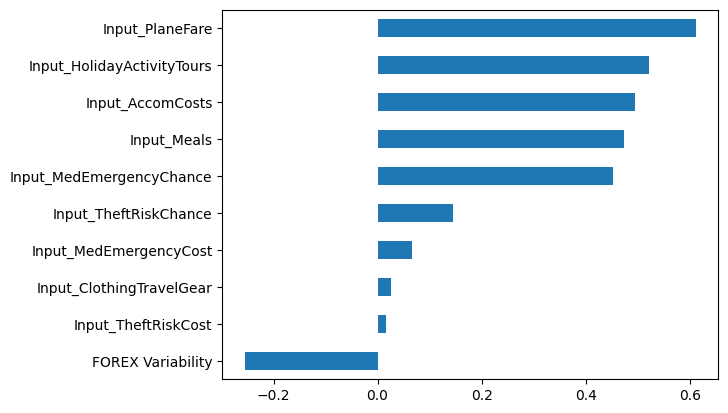

In [61]:
df_Correlation.T[0][1:].sort_values().plot.barh()

## Resources
